<a href="https://colab.research.google.com/github/Jacobgokul/ML-Playground/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Data Preprocessing?

When you want a computer to learn from data (like predicting house prices or whether a student passes), the data you give it is often messy or incomplete. Data preprocessing means cleaning and organizing that data so the computer can understand it better.

## Why do we need Data Preprocessing?
Imagine you have a school report card but some grades are missing, or some marks are in different formats (like letter grades vs numbers), or maybe some students have extra information others don’t. If you try to use this messy data directly, the computer can get confused and give wrong answers.

Preprocessing makes sure:

- Missing info is handled

- Data is in the right format

- Data is scaled properly (so that features with big numbers don’t overpower others)

- The computer can learn patterns better and faster

## How do we do Data Preprocessing?


### 1.Handling Missing Data

**What**:
Sometimes, some data points are missing, like a student's math score wasn’t recorded.

**Why**:

Computers can’t understand “blank” or “NaN” (not a number), so we need to fill or remove missing info.

**How**:

Remove rows with missing data (if few and not important)

Fill missing values using simple methods:

Mean: Use the average of that feature

Median: Use the middle value (good if data has outliers)

Mode: Use the most common value (for categories)

### 2.Scaling/Normalization
**What**:
Features can have very different scales. For example, height might be in centimeters (100–200) but test scores are out of 10.

**Why**:
Some ML algorithms treat bigger numbers as more important. So we scale data so all features are comparable.

**How**:

*Min-Max scaling*: Scale values to be between 0 and 1

*Standardization (Z-score)*: Center data to have mean 0 and standard deviation 1

### 3.Encoding Categorical Data
**What**: Computers only understand numbers. But some data is text like "Male" or "Female", or "Red", "Blue", "Green".

**Why**: We need to convert categories into numbers.

**How**:

*Label Encoding*: Assign numbers to categories (Male=0, Female=1)

*One-Hot Encoding*: Create new columns for each category with 0 or 1

In [ ]:
# Importing pandas library to handle and process data
import pandas as pd

# Loading the Titanic dataset from a CSV file
# (You can download Titanic dataset from https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Show first 5 rows of the dataset to understand what it looks like
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
len(data.columns)

12

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.shape

(891, 12)

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data['Age']

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [ ]:
mean_age = data['Age'].mean()

In [ ]:
data['Age'] = data['Age'].fillna(mean_age)

In [ ]:
column_to_be_dropped = ['PassengerId','Pclass', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
data.drop(columns=column_to_be_dropped, inplace=True)

In [ ]:
data.columns

Index(['Survived', 'Name', 'Sex', 'Age'], dtype='object')

In [ ]:
data.head()

,Survived,Name,Sex,Age
0,0,"Braund, Mr. Owen Harris",male,22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,"Heikkinen, Miss. Laina",female,26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,"Allen, Mr. William Henry",male,35.0


In [ ]:
data.drop(columns=['Name'], inplace=True)

In [ ]:
data.head()

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0


In [ ]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
data["is_child"] = data['Age'] < 18

In [ ]:
data

,Survived,Sex,Age,is_child
0,0,male,22.000000,False
1,1,female,38.000000,False
2,1,female,26.000000,False
3,1,female,35.000000,False
4,0,male,35.000000,False
...,...,...,...,...
886,0,male,27.000000,False
887,1,female,19.000000,False
888,0,female,29.699118,False
889,1,male,26.000000,False


In [ ]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [ ]:
data.head()

,Survived,Sex,Age,is_child
0,0,0,22.0,False
1,1,1,38.0,False
2,1,1,26.0,False
3,1,1,35.0,False
4,0,0,35.0,False


In [ ]:
df = pd.DataFrame({'Color': ['red', 'green', 'blue']})
df


,Color
0,red
1,green
2,blue


In [ ]:
df.shape

(3, 3)

In [ ]:
df = pd.get_dummies(df, columns=['Color'])
df

,Color_blue,Color_green,Color_red
0,False,False,True
1,False,True,False
2,True,False,False


In [ ]:
data.drop(columns=["is_child"], inplace=True)

In [ ]:
data

,Survived,Sex,Age
0,0,0,22.000000
1,1,1,38.000000
2,1,1,26.000000
3,1,1,35.000000
4,0,0,35.000000
...,...,...,...
886,0,0,27.000000
887,1,1,19.000000
888,0,1,29.699118
889,1,0,26.000000


In [ ]:
target -> output | Survived
feature -> input | Sex, Age

# Feature Engineering -> adding new feature (input data) to the model from old feature


In [ ]:
data["is_child"] = data['Age'] < 10
data["is_senior"] = data['Age'] < 40
data["is_teen"]= data['Age'] < 18 and data['Age'] > 10
data["is_young"] = data['Age'] > 18 and data['Age'] < 40

In [ ]:
# Define a function to classify age
def age_group(age):
    if age < 10:
        return "Child"
    elif age <= 18:
        return "Teen"
    elif age < 40:
        return "Young"
    else:
        return "Senior"

# Apply the function to create a new column
data["AgeGroup"] = data["Age"].apply(age_group)

# Show the first few rows
data[["Age", "AgeGroup"]].head()


,Age,AgeGroup
0,22.0,Young
1,38.0,Young
2,26.0,Young
3,35.0,Young
4,35.0,Young


In [ ]:
data

,Survived,Sex,Age,AgeGroup
0,0,0,22.000000,Young
1,1,1,38.000000,Young
2,1,1,26.000000,Young
3,1,1,35.000000,Young
4,0,0,35.000000,Young
...,...,...,...,...
886,0,0,27.000000,Young
887,1,1,19.000000,Young
888,0,1,29.699118,Young
889,1,0,26.000000,Young


from matplotlib import pyplot as plt
data['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Sex'].plot(kind='hist', bins=20, title='Sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('AgeGroup').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Survived', y='Sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Sex', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Sex'].plot(kind='line', figsize=(8, 4), title='Sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['AgeGroup'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Survived', y='AgeGroup', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['AgeGroup'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Sex', y='AgeGroup', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['AgeGroup'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Age', y='AgeGroup', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

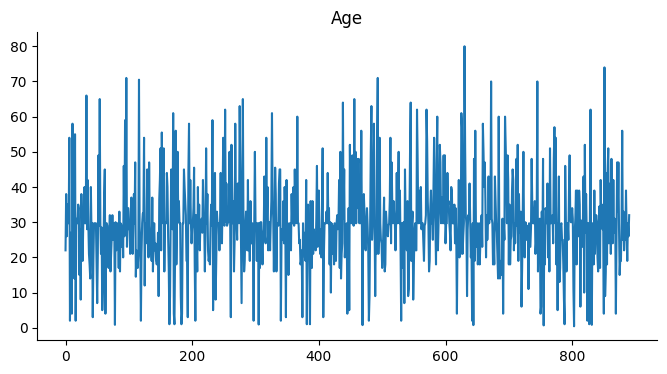

In [ ]:
from matplotlib import pyplot as plt
data['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

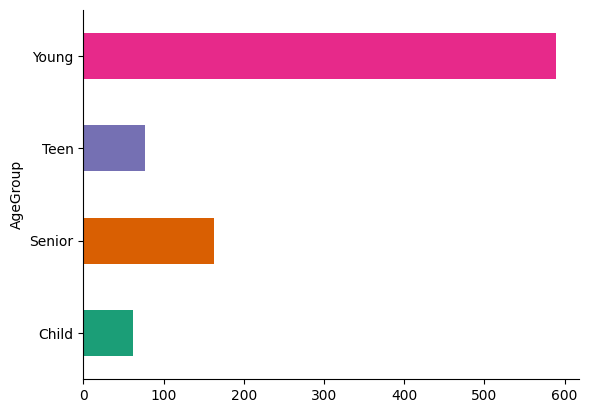

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('AgeGroup').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.drop(columns=['Age'])

In [ ]:
df

,Survived,Sex,AgeGroup
0,0,0,Young
1,1,1,Young
2,1,1,Young
3,1,1,Young
4,0,0,Young
...,...,...,...
886,0,0,Young
887,1,1,Young
888,0,1,Young
889,1,0,Young


In [ ]:
data

,Survived,Sex,Age,AgeGroup
0,0,0,22.000000,Young
1,1,1,38.000000,Young
2,1,1,26.000000,Young
3,1,1,35.000000,Young
4,0,0,35.000000,Young
...,...,...,...,...
886,0,0,27.000000,Young
887,1,1,19.000000,Young
888,0,1,29.699118,Young
889,1,0,26.000000,Young
